Import the Wine dataset from the scikit-learn library and create a linear SVM to classify "class" of the wine, based on the features "alcohol" and "flavanoids".

Visualize the relationship between the three variables.

Create a SVM model, Decision Tree model and Ensemble model of your choice.

Compare the performance of all the three models.

Try changing the Hyperparameters(of your choice) for these models and in a comment discuss breifly the impact this hyperparameter have on your models.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

In [2]:
winecol = datasets.load_wine()
print(winecol.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
wine_df = pd.DataFrame(winecol.data)
wine_df.columns = winecol.feature_names
print(wine_df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [4]:
wine_df['class'] = winecol.target
print(wine_df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  class  
0           

((178, 2), (178,))

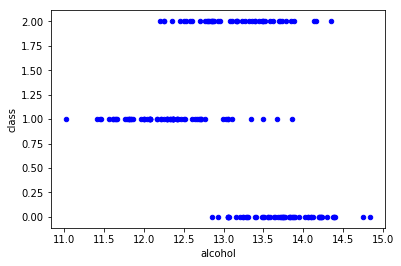

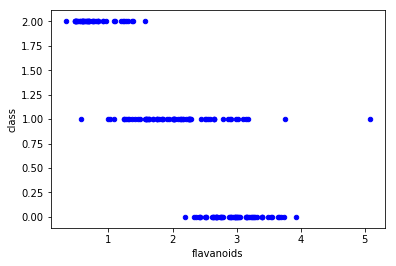

In [5]:
vib1 =wine_df.plot.scatter(x='alcohol',y='class',c='Blue')
vib2 =wine_df.plot.scatter(x='flavanoids',y='class',c='Blue')
winedf=wine_df[['malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'class', 'alcohol', 'flavanoids']]
X=winedf[winedf.columns[12:14]]
y=wine_df['class']
X.shape,y.shape

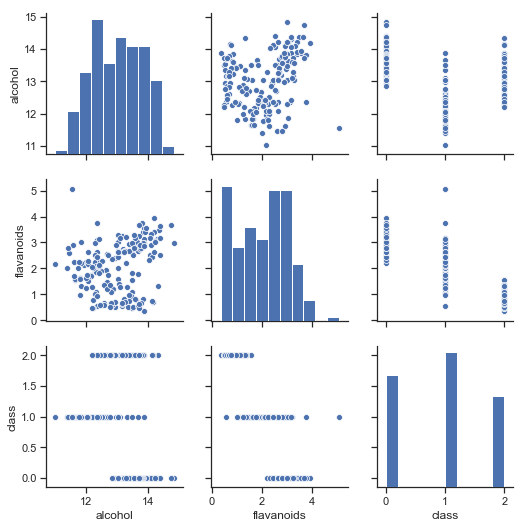

In [7]:
#scatterplot of all the variables
import seaborn as sns
sns.set(style="ticks")
Z=wine_df[['alcohol','flavanoids','class']]
sns.pairplot(Z)

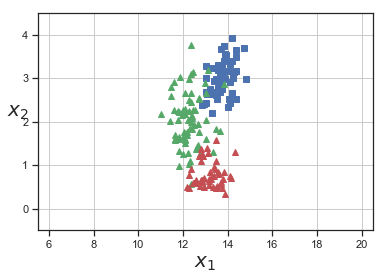

In [8]:
def plot_dataset(X, y, axes):
    plt.plot(X.values[:, 0][y==0], X.values[:, 1][y==0], "bs")
    plt.plot(X.values[:, 0][y==1], X.values[:, 1][y==1], "g^")
    plt.plot(X.values[:, 0][y==2], X.values[:, 1][y==2], "r^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [5.5, 20.5, -0.5,4.5])
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsOneClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
#("svm_clf", OneVsOneClassifier(SVC(kernel="poly", degree=3, coef0=1, C=5)))

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y).predict(X)

from sklearn.metrics import accuracy_score
y_pred = poly_kernel_svm_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9444444444444444

In [10]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=0.0005))
    ])
poly_kernel_svm_clf.fit(X, y).predict(X)

from sklearn.metrics import accuracy_score
y_pred = poly_kernel_svm_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.3888888888888889

In [ ]:
# We can see that when we decrease the hyperparameter, the accuracy too drops. When C decreases, there will be wider margin and more margin volations.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
# Create the classifier
tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
# Train the classifier on the training set
tree_clf.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
y_pred = tree_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9074074074074074

In [14]:
tree_clf = DecisionTreeClassifier(max_depth=1,random_state=42)
# Train the classifier on the training set
tree_clf.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
y_pred = tree_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.5740740740740741

In [ ]:
# When we decrease the depth of the decision tree, we can see the accuracy decreases i.e. Information gain also decreases. Since it's no longer mutually exclusive and collectively exhaustive.

In [17]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],  
    voting='hard')  
voting_clf.fit(X_train, y_train)


from sklearn.metrics import accuracy_score #predict accuracy 

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9074074074074074


C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ar

In [24]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(max_depth=1,random_state=42)
#svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf)],  
    voting='hard')  
voting_clf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score #predict accuracy 

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7962962962962963


C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_c

In [ ]:
#Here, we can see that when I remove one classifier from the ensemble, the accuracy drops. SInce diversity and accuracy is the main aim of ensembles.